In [36]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pywt


# AI Influencer Image Classification
In this notebook, I'll be using the AI Influencer Image Classification dataset scraped from Google to classify the images.

## Dataset Description
This dataset contains around 2000 images of 6 AI Influencers: Andrew Ng, Fei-Fei Li, Sam Altman, Geoffrey Hinton, Timnit_Gebru and Yoshua Bengio.

In [51]:
img=cv2.imread('dataset/Andrew_Ng/andrewng_1-7.jpg')
img.shape

(3000, 2260, 3)

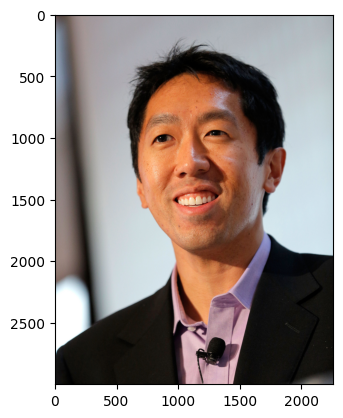

In [38]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

In [39]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(3000, 2260)

I've downloaded haarcascades folder from OpenCv git repository. It contains Face Detection Cascade Classifiers.
They'll be used to detect faces in the images for data cleaning.

In [40]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 548,  533, 1143, 1143]], dtype=int32)

In [41]:
(x,y,w,h) = faces[0]
x,y,w,h

(548, 533, 1143, 1143)

This function places a rectangle around the face and eyes in the image.

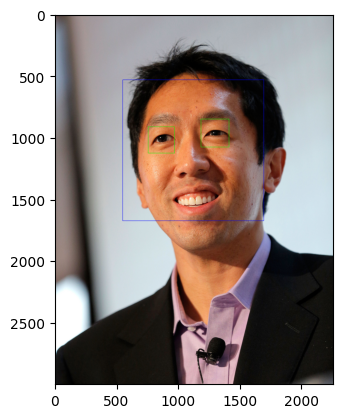

In [42]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB), cmap='gray')
plt.show()

This function is used to crop the image around the face if it has 2 eyes.

In [43]:
def get_image_face_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

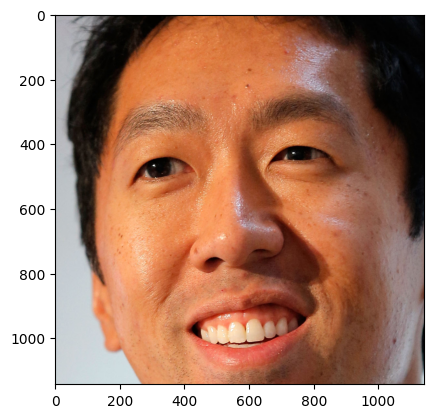

In [44]:
cropped_image=get_image_face_if_2_eyes('dataset/Andrew_Ng/andrewng_1-7.jpg')
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


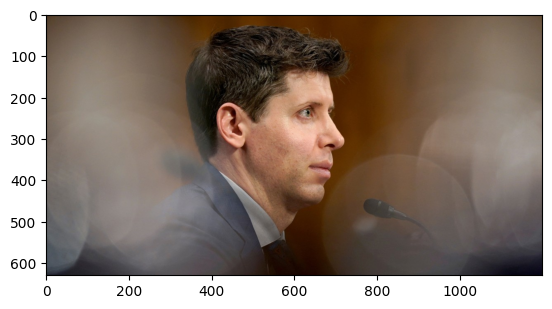

In [45]:
one_eye_image=cv2.imread('dataset/Sam _Altman/230828-sam-altman-se-146p-e2b224.jpg')
plt.imshow(cv2.cvtColor(one_eye_image, cv2.COLOR_BGR2RGB))

The function returns nothing for an image with 1 eye.

In [46]:
cropped_image_1_eye=get_image_face_if_2_eyes('dataset/Sam _Altman/230828-sam-altman-se-146p-e2b224.jpg')
cropped_image_1_eye


In [47]:
path_to_data='dataset/'
path_to_cr_data="dataset/cropped_images/"

In [48]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        
        img_dirs.append(entry.path)
img_dirs

['dataset/Fei-Fei_Li',
 'dataset/Geoffrey Hinton',
 'dataset/Yoshua Bengio',
 'dataset/Sam _Altman',
 'dataset/Timnit_Gebru ',
 'dataset/Andrew_Ng',
 'dataset/cropped_images']

In [49]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [50]:
cropped_image_dirs = []
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
        
    for entry in os.scandir(img_dir):
      #   print(entry.path)
        try:
            roi_color = get_image_face_if_2_eyes(entry.path)
        except cv2.error as e:
            continue

        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            count += 1   

Fei-Fei_Li


Geoffrey Hinton
Yoshua Bengio
Sam _Altman
Timnit_Gebru 
Andrew_Ng
cropped_images


After that I manually cleaned the images of the wrong people and moved them to cropped_images_final folder. 